# 1 - Introduction

This notebook train four different neural network models. They are all pretty similar.

## 1.1 Load Packages and Global Variables

In [1]:
%matplotlib inline
import os
import numpy as np
import nltk
from sklearn.externals import joblib
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
os.chdir(PROJECT_DIR)

In [3]:
os.getcwd()

'C:\\Users\\wertu\\Documents\\Datascience\\udacity-ml-capstone'

In [4]:
import src.neural_networks as nn
from src.evaluation import roc_plot

In [5]:
from importlib import reload
nn = reload(nn)

## 1.2- Load the Data

Load the train and validation neural network data sets if they are present, otherwise raise an exception.

In [6]:
#Load sequnces
try:
    train = joblib.load('data/processed/train_nn.pkl')
    valid = joblib.load('data/processed/valid_nn.pkl')
    test = joblib.load('data/processed/test_nn.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [7]:
#Load embedding matrix of 50 dimensions
try:
    embedding_matrix50 = joblib.load('data/interim/embeddings50.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [8]:
#Load embedding matrix of 300 dimensions
try:
    embedding_matrix300 = joblib.load('data/interim/embeddings300.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [9]:
#these arguments will be the same when training both models
run_args = {"train":(train["seqs"],train["labels"]),
            "valid":(valid["seqs"],valid["labels"])}

# 4 - Train 50d model with trainable embeds

Will now make embedding layer of first model trainable. Dropout of inputs to recurrent layer is automatically increased when the embedding layer is trainable

In [10]:
model50_trained = nn.create_model(n_hidden=150, embedding_matrix=embedding_matrix50, train_embed=True)

In [11]:
#Load weights
model50_trained.load_weights('models/nn_50d_fixed.hdf5')
model50_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           1369800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 50)           0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 50)           0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 50)           0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               120600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [12]:
#now train
#decrease learning rate from default of 0.001
#increase patience to compensae to 50 from 25
#and remove calculation of training auc to speed up
history50_trained = nn.run_model(model=model50_trained,out_path="models/nn_50d_trainedv2.hdf5",
                                 patience=50, train_auc=False, **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6256 - acc: 0.6478 val_auc: 73.0047%
Epoch 00001: val_auc improved from -inf to 0.73005, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 145s 841us/step - loss: 0.6255 - acc: 0.6478 - val_loss: 0.6089 - val_acc: 0.6628
Epoch 2/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6225 - acc: 0.6506 val_auc: 72.9017%
Epoch 00002: val_auc did not improve
171945/171945 [==============================] - 101s 587us/step - loss: 0.6224 - acc: 0.6508 - val_loss: 0.6109 - val_acc: 0.6594
Epoch 3/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.6203 - acc: 0.6526 val_auc: 72.9213%
Epoch 00003: val_auc did not improve
171945/171945 [==============================] - 101s 586us/step - loss: 0.6204 - acc: 0.6526 - val_loss: 0.6107 - val_acc: 0.6591
Epoch 4/1000
170000/171945 [======

170000/171945 [============================>.] - ETA: 0s - loss: 0.5962 - acc: 0.6799 val_auc: 74.2042%
Epoch 00026: val_auc improved from 0.74168 to 0.74204, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 103s 597us/step - loss: 0.5962 - acc: 0.6799 - val_loss: 0.6054 - val_acc: 0.6714
Epoch 27/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5953 - acc: 0.6813 val_auc: 74.2281%
Epoch 00027: val_auc improved from 0.74204 to 0.74228, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 101s 590us/step - loss: 0.5954 - acc: 0.6813 - val_loss: 0.6040 - val_acc: 0.6723
Epoch 28/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5921 - acc: 0.6841 val_auc: 74.2797%
Epoch 00028: val_auc improved from 0.74228 to 0.74280, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 101s 588us/step - loss: 0.5920 - acc: 0.6839 - va

Epoch 51/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5642 - acc: 0.7101 val_auc: 75.4351%
Epoch 00051: val_auc improved from 0.75275 to 0.75435, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 100s 584us/step - loss: 0.5644 - acc: 0.7101 - val_loss: 0.5999 - val_acc: 0.6850
Epoch 52/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5641 - acc: 0.7096 val_auc: 75.3917%
Epoch 00052: val_auc did not improve
171945/171945 [==============================] - 100s 583us/step - loss: 0.5641 - acc: 0.7097 - val_loss: 0.6011 - val_acc: 0.6844
Epoch 53/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5621 - acc: 0.7105 val_auc: 75.3561%
Epoch 00053: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.5622 - acc: 0.7105 - val_loss: 0.6018 - val_acc: 0.6840
Epoch 54/1000
170000/171945 [============================>.] - ETA: 0s - loss: 

170000/171945 [============================>.] - ETA: 0s - loss: 0.5320 - acc: 0.7337 val_auc: 75.9302%
Epoch 00077: val_auc improved from 0.75910 to 0.75930, saving model to models/nn_50d_trainedv2.hdf5
171945/171945 [==============================] - 100s 583us/step - loss: 0.5320 - acc: 0.7336 - val_loss: 0.6061 - val_acc: 0.6906
Epoch 78/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5303 - acc: 0.7359 val_auc: 75.6807%
Epoch 00078: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.5303 - acc: 0.7359 - val_loss: 0.6114 - val_acc: 0.6879
Epoch 79/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5288 - acc: 0.7375 val_auc: 75.8174%
Epoch 00079: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.5288 - acc: 0.7376 - val_loss: 0.6091 - val_acc: 0.6889
Epoch 80/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.5273 - acc: 

Epoch 105/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4976 - acc: 0.7584 val_auc: 75.9388%
Epoch 00105: val_auc did not improve
171945/171945 [==============================] - 100s 584us/step - loss: 0.4978 - acc: 0.7584 - val_loss: 0.6238 - val_acc: 0.6873
Epoch 106/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4970 - acc: 0.7585 val_auc: 75.9454%
Epoch 00106: val_auc did not improve
171945/171945 [==============================] - 100s 583us/step - loss: 0.4972 - acc: 0.7583 - val_loss: 0.6211 - val_acc: 0.6895
Epoch 107/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4958 - acc: 0.7600 val_auc: 75.9693%
Epoch 00107: val_auc did not improve
171945/171945 [==============================] - 101s 585us/step - loss: 0.4956 - acc: 0.7600 - val_loss: 0.6216 - val_acc: 0.6899
Epoch 108/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4937 - acc: 0.7596 val_auc: 75.9677%
Epoch 00108: val_auc

Epoch 134/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4637 - acc: 0.7782 val_auc: 75.5156%
Epoch 00134: val_auc did not improve
171945/171945 [==============================] - 100s 583us/step - loss: 0.4638 - acc: 0.7781 - val_loss: 0.6513 - val_acc: 0.6851
Epoch 135/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4621 - acc: 0.7798 val_auc: 75.6635%
Epoch 00135: val_auc did not improve
171945/171945 [==============================] - 100s 583us/step - loss: 0.4620 - acc: 0.7799 - val_loss: 0.6463 - val_acc: 0.6892
Epoch 136/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4623 - acc: 0.7796 val_auc: 75.5669%
Epoch 00136: val_auc did not improve
171945/171945 [==============================] - 100s 582us/step - loss: 0.4622 - acc: 0.7797 - val_loss: 0.6478 - val_acc: 0.6864
Epoch 137/1000
170000/171945 [============================>.] - ETA: 0s - loss: 0.4611 - acc: 0.7800 val_auc: 75.5370%
Epoch 00137: val_auc

In [13]:
#save history
joblib.dump(history50_trained.history, "data/interim/nn50_trained_historyv2.pkl")

['data/interim/nn50_trained_historyv2.pkl']

# 5 - Train 300d model with trainable embeds

In [14]:
#create model
model300_trained = nn.create_model(embedding_matrix=embedding_matrix300, n_hidden=150, train_embed=True)
model300_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 300)          8218800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 300)          0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 300)          0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 300)          0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               270600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [15]:
#load in weights
model300_trained.load_weights('models/nn_300d_fixed.hdf5')

In [16]:
%%time
history300_trained = nn.run_model(model=model300_trained, out_path="models/nn_300d_trainedv2.hdf5",
                                  patience=50, train_auc=False, **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6173 - acc: 0.6594 val_auc: 74.1585%
Epoch 00001: val_auc improved from -inf to 0.74158, saving model to models/nn_300d_trainedv2.hdf5
171945/171945 [==============================] - 163s 951us/step - loss: 0.6172 - acc: 0.6596 - val_loss: 0.6027 - val_acc: 0.6705
Epoch 2/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6070 - acc: 0.6707 val_auc: 74.3723%
Epoch 00002: val_auc improved from 0.74158 to 0.74372, saving model to models/nn_300d_trainedv2.hdf5
171945/171945 [==============================] - 115s 670us/step - loss: 0.6071 - acc: 0.6709 - val_loss: 0.6022 - val_acc: 0.6738
Epoch 3/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.6014 - acc: 0.6760 val_auc: 74.3898%
Epoch 00003: val_auc improved from 0.74372 to 0.74390, saving model to models/nn_300d_trainedv2.hdf5
171945/171945 [=====================

Epoch 26/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5260 - acc: 0.7398 val_auc: 75.4316%
Epoch 00026: val_auc did not improve
171945/171945 [==============================] - 115s 669us/step - loss: 0.5259 - acc: 0.7397 - val_loss: 0.6147 - val_acc: 0.6887
Epoch 27/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5235 - acc: 0.7417 val_auc: 75.5575%
Epoch 00027: val_auc improved from 0.75557 to 0.75557, saving model to models/nn_300d_trainedv2.hdf5
171945/171945 [==============================] - 115s 670us/step - loss: 0.5236 - acc: 0.7418 - val_loss: 0.6165 - val_acc: 0.6878
Epoch 28/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.5213 - acc: 0.7420 val_auc: 75.4323%
Epoch 00028: val_auc did not improve
171945/171945 [==============================] - 115s 669us/step - loss: 0.5213 - acc: 0.7422 - val_loss: 0.6181 - val_acc: 0.6882
Epoch 29/1000
170000/171945 [============================>.] - ETA: 1s - loss:

170000/171945 [============================>.] - ETA: 1s - loss: 0.4593 - acc: 0.7826 val_auc: 74.9354%
Epoch 00054: val_auc did not improve
171945/171945 [==============================] - 115s 669us/step - loss: 0.4592 - acc: 0.7826 - val_loss: 0.6702 - val_acc: 0.6843
Epoch 55/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.4553 - acc: 0.7849 val_auc: 74.9524%
Epoch 00055: val_auc did not improve
171945/171945 [==============================] - 115s 668us/step - loss: 0.4553 - acc: 0.7848 - val_loss: 0.6737 - val_acc: 0.6842
Epoch 56/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.4556 - acc: 0.7841 val_auc: 74.9975%
Epoch 00056: val_auc did not improve
171945/171945 [==============================] - 115s 669us/step - loss: 0.4555 - acc: 0.7842 - val_loss: 0.6775 - val_acc: 0.6847
Epoch 57/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.4522 - acc: 0.7858 val_auc: 74.8628%
Epoch 00057: val_auc did not improve
1

Epoch 83/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.4009 - acc: 0.8160 val_auc: 74.0169%
Epoch 00083: val_auc did not improve
171945/171945 [==============================] - 115s 668us/step - loss: 0.4008 - acc: 0.8160 - val_loss: 0.7574 - val_acc: 0.6776
Epoch 84/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.3987 - acc: 0.8165 val_auc: 73.8350%
Epoch 00084: val_auc did not improve
171945/171945 [==============================] - 115s 670us/step - loss: 0.3986 - acc: 0.8165 - val_loss: 0.7653 - val_acc: 0.6755
Epoch 85/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.3977 - acc: 0.8174 val_auc: 73.8901%
Epoch 00085: val_auc did not improve
171945/171945 [==============================] - 115s 669us/step - loss: 0.3979 - acc: 0.8174 - val_loss: 0.7657 - val_acc: 0.6759
Epoch 86/1000
170000/171945 [============================>.] - ETA: 1s - loss: 0.3968 - acc: 0.8177 val_auc: 73.8496%
Epoch 00086: val_auc did

In [ ]:
#save history
joblib.dump(history300_trained.history, "data/interim/nn300_trained_historyv2.pkl")

# Analyze

In [17]:
#load histories
model_names = ("nn50_fixed","nn300_fixed","nn50_trained","nn300_trainedv2")
hist_list = [joblib.load("data/interim/"+hist+"_history.pkl") for hist in model_names]

FileNotFoundError: [Errno 2] No such file or directory: 'data/interim/nn50_trainedv2_history.pkl'

In [18]:
model50_trained.load_weights("models/nn_50d_trainedv2.hdf5")

In [20]:
preds = model50_trained.predict(test["seqs"], batch_size=2000)

In [21]:
np.mean(np.squeeze(preds > .5) == test["labels"])

0.6847860933993517

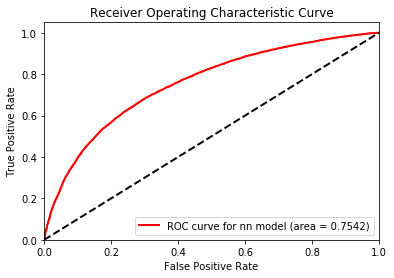

In [22]:
roc_plot(np.expand_dims(test["labels"],1),
                    [preds],
                    ["nn"],
                    'reports/figures/nn.svg')